## TRAIN 

## DATA PREPROCESSING

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


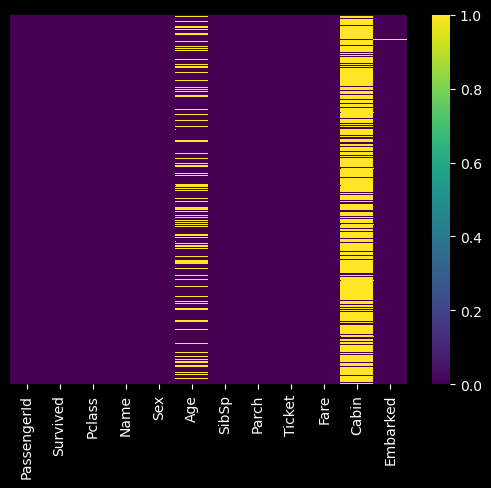

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [5]:
df.shape

(891, 12)

In [6]:
x = df.isnull().sum()
print(x)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#TAKING CARE OF CATEGORICAL AND NAN VALUES

#MEDIAN
df['Age'] = df['Age'].fillna(df['Age'].median()) 

#MODE
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#DROP
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)
df.drop(['PassengerId'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)

#CATEGORICAL VARIABLES
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


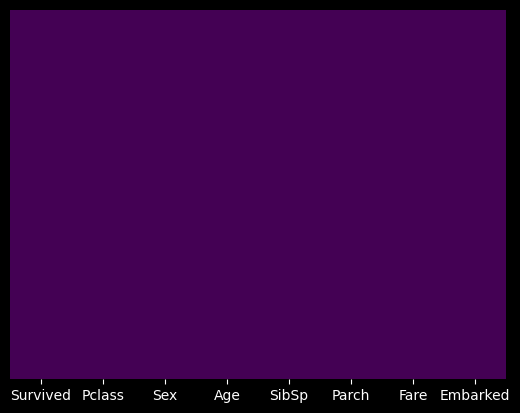

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
X_train=df.drop(['Survived'],axis=1)
y_train=df['Survived']

In [11]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  28.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]


## MODEL SELECTION AND TRAINING

In [12]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators=10,criterion = 'entropy' ,random_state=0)
#classifier.fit(X_train,y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

c:\Users\ViVian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
x_test = pd.read_csv('testset.csv')
print(x_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1  27.0      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1  27.0      0      0    8.0500         2
417       3    1  27.0      1      1   22.3583         0

[418 rows x 7 columns]


In [28]:
y_pred = classifier.predict(x_test)

In [29]:
pass_id = []
for i in range(892,1310):
    pass_id = np.append(pass_id, i)

print(pass_id)

[ 892.  893.  894.  895.  896.  897.  898.  899.  900.  901.  902.  903.
  904.  905.  906.  907.  908.  909.  910.  911.  912.  913.  914.  915.
  916.  917.  918.  919.  920.  921.  922.  923.  924.  925.  926.  927.
  928.  929.  930.  931.  932.  933.  934.  935.  936.  937.  938.  939.
  940.  941.  942.  943.  944.  945.  946.  947.  948.  949.  950.  951.
  952.  953.  954.  955.  956.  957.  958.  959.  960.  961.  962.  963.
  964.  965.  966.  967.  968.  969.  970.  971.  972.  973.  974.  975.
  976.  977.  978.  979.  980.  981.  982.  983.  984.  985.  986.  987.
  988.  989.  990.  991.  992.  993.  994.  995.  996.  997.  998.  999.
 1000. 1001. 1002. 1003. 1004. 1005. 1006. 1007. 1008. 1009. 1010. 1011.
 1012. 1013. 1014. 1015. 1016. 1017. 1018. 1019. 1020. 1021. 1022. 1023.
 1024. 1025. 1026. 1027. 1028. 1029. 1030. 1031. 1032. 1033. 1034. 1035.
 1036. 1037. 1038. 1039. 1040. 1041. 1042. 1043. 1044. 1045. 1046. 1047.
 1048. 1049. 1050. 1051. 1052. 1053. 1054. 1055. 10

In [30]:
final_df = np.concatenate((pass_id.reshape(len(pass_id),1),y_pred.reshape(len(y_pred),1)),1)
final_df = pd.DataFrame(final_df, columns = ['PassengerId','Survived'])
final_df = final_df.astype(int)
#print(final_df)

In [31]:
final_df.to_csv('answer.csv',index=False)